In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [2]:
pd.options.display.max_columns = None

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
print("Archivos en el directorio actual:")
print(os.listdir("."))

Archivos en el directorio actual:
['.config', 'drive', 'sample_data']


In [5]:
# Verificar qué archivos hay en el directorio actual
print("Archivos en el directorio actual:")
print(os.listdir("."))

# Verificar si el archivo específico existe
if os.path.exists('./drive/MyDrive/NoteFactoriaF5/all-states-history.csv'):
    print("✅ El archivo all-states-history.csv existe")
else:
    print("❌ El archivo all-states-history.csv NO existe")

Archivos en el directorio actual:
['.config', 'drive', 'sample_data']
✅ El archivo all-states-history.csv existe


In [6]:
# Cargar archivo CSV
df = pd.read_csv('./drive/MyDrive/NoteFactoriaF5/all-states-history.csv')

In [7]:
# Aseguramos que sea DataFrame
df = pd.DataFrame(df)

In [8]:
# Visualizar las primeras filas
df.head(5)

date state    death  deathConfirmed  deathIncrease  deathProbable  \
0  2021-03-07    AK    305.0             NaN              0            NaN   
1  2021-03-07    AL  10148.0          7963.0             -1         2185.0   
2  2021-03-07    AR   5319.0          4308.0             22         1011.0   
3  2021-03-07    AS      0.0             NaN              0            NaN   
4  2021-03-07    AZ  16328.0         14403.0              5         1925.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0        1293.0                  1293.0                   33.0   
1       45976.0                 45976.0                  494.0   
2       14926.0                 14926.0                  335.0   
3           NaN                     NaN                    NaN   
4       57907.0                 57907.0                  963.0   

   hospitalizedIncrease  inIcuCumulative  inIcuCurrently   negative  \
0                     0              NaN             NaN        NaN   
1                     0           2676.0             NaN  1931711.0   
2                    11              NaN           141.0  2480716.0   
3                     0              NaN             NaN     2140.0   
4                    44              NaN           273.0  3073010.0   

   negativeIncrease  negativeTestsAntibody  negativeTestsPeopleAntibody  \
0                 0                    NaN                          NaN   
1              2087                    NaN                          NaN   
2              3267                    NaN                          NaN   
3                 0                    NaN                          NaN   
4             13678                    NaN                          NaN   

   negativeTestsViral  onVentilatorCumulative  onVentilatorCurrently  \
0           1660758.0                     NaN                    2.0   
1                 NaN                  1515.0                    NaN   
2           2480716.0                  1533.0                   65.0   
3                 NaN                     NaN                    NaN   
4                 NaN                     NaN                  143.0   

   positive  positiveCasesViral  positiveIncrease  positiveScore  \
0   56886.0                 NaN                 0              0   
1  499819.0            392077.0               408              0   
2  324818.0            255726.0               165              0   
3       0.0                 0.0                 0              0   
4  826454.0            769935.0              1335              0   

   positiveTestsAntibody  positiveTestsAntigen  positiveTestsPeopleAntibody  \
0                    NaN                   NaN                          NaN   
1                    NaN                   NaN                          NaN   
2                    NaN                   NaN                          NaN   
3                    NaN                   NaN                          NaN   
4                    NaN                   NaN                          NaN   

   positiveTestsPeopleAntigen  positiveTestsViral  recovered  \
0                         NaN             68693.0        NaN   
1                         NaN                 NaN   295690.0   
2                     81803.0                 NaN   315517.0   
3                         NaN                 NaN        NaN   
4                         NaN                 NaN        NaN   

   totalTestEncountersViral  totalTestEncountersViralIncrease  \
0                       NaN                                 0   
1                       NaN                                 0   
2                       NaN                                 0   
3                       NaN                                 0   
4                       NaN                                 0   

   totalTestResults  totalTestResultsIncrease  totalTestsAntibody  \
0         1731628.0                         0                 NaN   
1         2323788.0               

# 📉 Estadística descriptiva

In [9]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 20780 filas y 41 columnas


In [10]:
# Comprobamos el nombre de las columnas
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [11]:
# Seleccionamos 5 filas al azar para ver los datos
df.sample(5)

date state    death  deathConfirmed  deathIncrease  \
18772  2020-04-06    GU      4.0             NaN              0   
7626   2020-10-22    FL  16470.0             NaN            162   
19788  2020-03-19    LA      8.0             NaN              2   
6687   2020-11-08    ME    152.0           151.0              0   
5254   2020-12-04    TN   4876.0          4439.0             95   

       deathProbable  hospitalized  hospitalizedCumulative  \
18772            NaN           NaN                     NaN   
7626             NaN       48320.0                 48320.0   
19788            NaN           NaN                     NaN   
6687             1.0         525.0                   525.0   
5254           437.0       12488.0                 12488.0   

       hospitalizedCurrently  hospitalizedIncrease  inIcuCumulative  \
18772                   21.0                     0              NaN   
7626                  2074.0                   149              NaN   
19788                    NaN                     0              NaN   
6687                    48.0                     2              NaN   
5254                  2751.0                    78              NaN   

       inIcuCurrently   negative  negativeIncrease  negativeTestsAntibody  \
18772             2.0      505.0                12                    NaN   
7626              NaN  5053848.0             46290               487730.0   
19788             NaN      458.0               123                    NaN   
6687             13.0        NaN                 0                11868.0   
5254            652.0        NaN                 0                    NaN   

       negativeTestsPeopleAntibody  negativeTestsViral  \
18772                          NaN                 NaN   
7626                      475588.0           7420252.0   
19788                          NaN                 NaN   
6687                           NaN                 NaN   
5254                           NaN           4195346.0   

       onVentilatorCumulative  onVentilatorCurrently  positive  \
18772                     NaN                    NaN     113.0   
7626                      NaN                    NaN  758306.0   
19788                     NaN                    NaN     347.0   
6687                      NaN                    7.0    7693.0   
5254                      NaN                  325.0  392608.0   

       positiveCasesViral  positiveIncrease  positiveScore  \
18772                 NaN                 1              0   
7626             731460.0              5461              0   
19788               347.0               107              0   
6687               6843.0                90              0   
5254             360201.0              4356              0   

       positiveTestsAntibody  positiveTestsAntigen  \
18772                    NaN                   NaN   
7626                 51923.0                   NaN   
19788                    NaN                   NaN   
6687                   367.0                  33.0   
5254                     NaN               33795.0   

       positiveTestsPeopleAntibody  positiveTestsPeopleAntigen  \
18772                          NaN                         NaN   
7626                       50676.0                         NaN   
19788                          NaN                         NaN   
6687                           NaN                         NaN   
5254                           NaN                         NaN   

       positiveTestsViral  recovered  totalTestEncountersViral  \
18772                 NaN       25.0                       NaN   
7626             988033.0        NaN                 9318880.0   
19788                 NaN        NaN                       NaN   
6687               8192.0     5935.0                       NaN   
5254             423591.0   351553.0                       NaN   

       totalTestEncountersViralIncrease  totalTestResults  \
18772                                 0         

In [12]:
# Información general del dataset
# Tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

In [13]:
# Contamos valores no nulos por columna
df.count()

date                                20780
state                               20780
death                               19930
deathConfirmed                       9422
deathIncrease                       20780
deathProbable                        7593
hospitalized                        12382
hospitalizedCumulative              12382
hospitalizedCurrently               17339
hospitalizedIncrease                20780
inIcuCumulative                      3789
inIcuCurrently                      11636
negative                            13290
negativeIncrease                    20780
negativeTestsAntibody                1458
negativeTestsPeopleAntibody           972
negativeTestsViral                   5024
onVentilatorCumulative               1290
onVentilatorCurrently                9126
positive                            20592
positiveCasesViral                  14246
positiveIncrease                    20780
positiveScore                       20780
positiveTestsAntibody                3346
positiveTestsAntigen                 2233
positiveTestsPeopleAntibody          1094
positiveTestsPeopleAntigen            633
positiveTestsViral                   8958
recovered                           12003
totalTestEncountersViral             5231
totalTestEncountersViralIncrease    20780
totalTestResults                    20614
totalTestResultsIncrease            20780
totalTestsAntibody                   4789
totalTestsAntigen                    3421
totalTestsPeopleAntibody             2200
totalTestsPeopleAntigen               999
totalTestsPeopleViral                9197
totalTestsPeopleViralIncrease       20780
totalTestsViral                     14516
totalTestsViralIncrease             20780
dtype: int64

In [14]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

death  deathConfirmed  deathIncrease  deathProbable  \
count  19930.000000     9422.000000   20780.000000    7593.000000   
mean    3682.216859     3770.182764      24.790712     417.291321   
std     6281.366321     4157.640633      60.162742     537.625982   
min        0.000000        0.000000    -201.000000       0.000000   
25%      161.250000      607.000000       0.000000      79.000000   
50%     1108.000000     2409.500000       6.000000     216.000000   
75%     4387.500000     5462.000000      24.000000     460.000000   
max    54124.000000    21177.000000    2559.000000    2594.000000   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
count  12382.000000            12382.000000           17339.000000   
mean    9262.762478             9262.762478            1190.576965   
std    12620.544081            12620.544081            2060.041207   
min        1.000000                1.000000               0.000000   
25%      985.250000              985.250000             166.500000   
50%     4472.000000             4472.000000             531.000000   
75%    12248.500000            12248.500000            1279.000000   
max    82237.000000            82237.000000           22851.000000   

       hospitalizedIncrease  inIcuCumulative  inIcuCurrently      negative  \
count          20780.000000      3789.000000    11636.000000  1.329000e+04   
mean              37.360780      1934.191607      359.621176  8.482246e+05   
std              208.237151      1953.329983      594.831150  1.344501e+06   
min           -12257.000000         6.000000        0.000000  0.000000e+00   
25%                0.000000       501.000000       60.000000  5.394125e+04   
50%                0.000000      1295.000000      172.000000  3.059720e+05   
75%               36.000000      2451.000000      380.000000  1.056611e+06   
max            16373.000000      9263.000000     5225.000000  1.018694e+07   

       negativeIncrease  negativeTestsAntibody  negativeTestsPeopleAntibody  \
count      20780.000000            1458.000000                   972.000000   
mean        3589.128874          145580.733196                188710.969136   
std        11577.190442          190042.827960                200218.073746   
min      -968686.000000             587.000000                     1.000000   
25%            0.000000           11242.000000                 54874.000000   
50%          141.500000           78888.000000                100282.000000   
75%         3916.000000          162925.500000                261121.000000   
max       212974.000000          864153.000000                816231.000000   

       negativeTestsViral  onVentilatorCumulative  onVentilatorCurrently  \
count        5.024000e+03             1290.000000            9126.000000   
mean         1.818574e+06              574.659690             151.589305   
std          2.495555e+06              434.603472             207.755157   
min          1.000000e+00               32.000000               0.000000   
25%          3.032998e+05              220.250000              29.000000   
50%          9.365995e+05              412.000000              86.000000   
75%          2.316865e+06              818.000000             185.000000   
max          1.688741e+07             1533.000000            2425.000000   

           positive  positiveCasesViral  positiveIncrease  positiveScore  \
count  2.059200e+04        1.424600e+04      20780.000000        20780.0   
mean   1.651560e+05        1.786625e+05       1383.849519            0.0   
std    3.267852e+05        3.350851e+05       3023.558742            0.0   
min    0.000000e+00        0.000000e+00      -7757.000000            0.0   
25%    5.753750e+03        1.037575e+04         65.000000            0.0   
50%    4.606450e+04        6.844150e+04        435.000000            0.0   
75%    1.779580e+05        2.024250e+05       1335.250000            0.0   
max    3.501394e+06        3.501394e+06      71734.00

In [15]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

# 🔍 ¿Hay valores nulos?

In [16]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

positiveTestsPeopleAntigen          20147
negativeTestsPeopleAntibody         19808
totalTestsPeopleAntigen             19781
positiveTestsPeopleAntibody         19686
onVentilatorCumulative              19490
negativeTestsAntibody               19322
totalTestsPeopleAntibody            18580
positiveTestsAntigen                18547
positiveTestsAntibody               17434
totalTestsAntigen                   17359
inIcuCumulative                     16991
totalTestsAntibody                  15991
negativeTestsViral                  15756
totalTestEncountersViral            15549
deathProbable                       13187
positiveTestsViral                  11822
onVentilatorCurrently               11654
totalTestsPeopleViral               11583
deathConfirmed                      11358
inIcuCurrently                       9144
recovered                            8777
hospitalized                         8398
hospitalizedCumulative               8398
negative                             7490
positiveCasesViral                   6534
totalTestsViral                      6264
hospitalizedCurrently                3441
death                                 850
positive                              188
totalTestResults                      166
state                                   0
date                                    0
deathIncrease                           0
positiveIncrease                        0
positiveScore                           0
hospitalizedIncrease                    0
negativeIncrease                        0
totalTestResultsIncrease                0
totalTestEncountersViralIncrease        0
totalTestsPeopleViralIncrease           0
totalTestsViralIncrease                 0
dtype: int64

# ➕ ¿Son más del 25%?

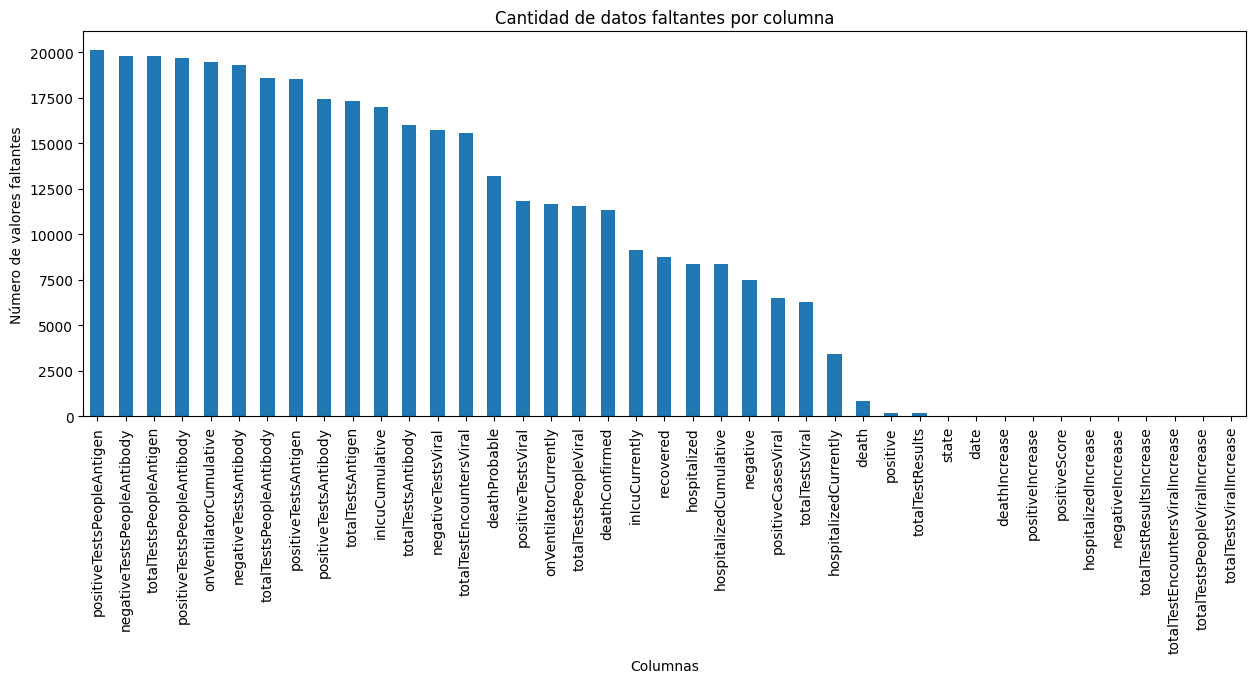

In [17]:
# Verifico si los nulos superan el 25%

# Primero miro el número total por columna de datos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))
missing.plot(kind='bar')
plt.title("Cantidad de datos faltantes por columna")
plt.ylabel("Número de valores faltantes")
plt.xlabel("Columnas")
plt.show()

In [18]:
# calcular % de nulos
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

positiveTestsPeopleAntigen          96.953802
negativeTestsPeopleAntibody         95.322425
totalTestsPeopleAntigen             95.192493
positiveTestsPeopleAntibody         94.735322
onVentilatorCumulative              93.792108
negativeTestsAntibody               92.983638
totalTestsPeopleAntibody            89.412897
positiveTestsAntigen                89.254090
positiveTestsAntibody               83.897979
totalTestsAntigen                   83.537055
inIcuCumulative                     81.766121
totalTestsAntibody                  76.953802
negativeTestsViral                  75.822907
totalTestEncountersViral            74.826756
deathProbable                       63.460058
positiveTestsViral                  56.891242
onVentilatorCurrently               56.082772
totalTestsPeopleViral               55.741097
deathConfirmed                      54.658325
inIcuCurrently                      44.003850
recovered                           42.237729
hospitalized                      

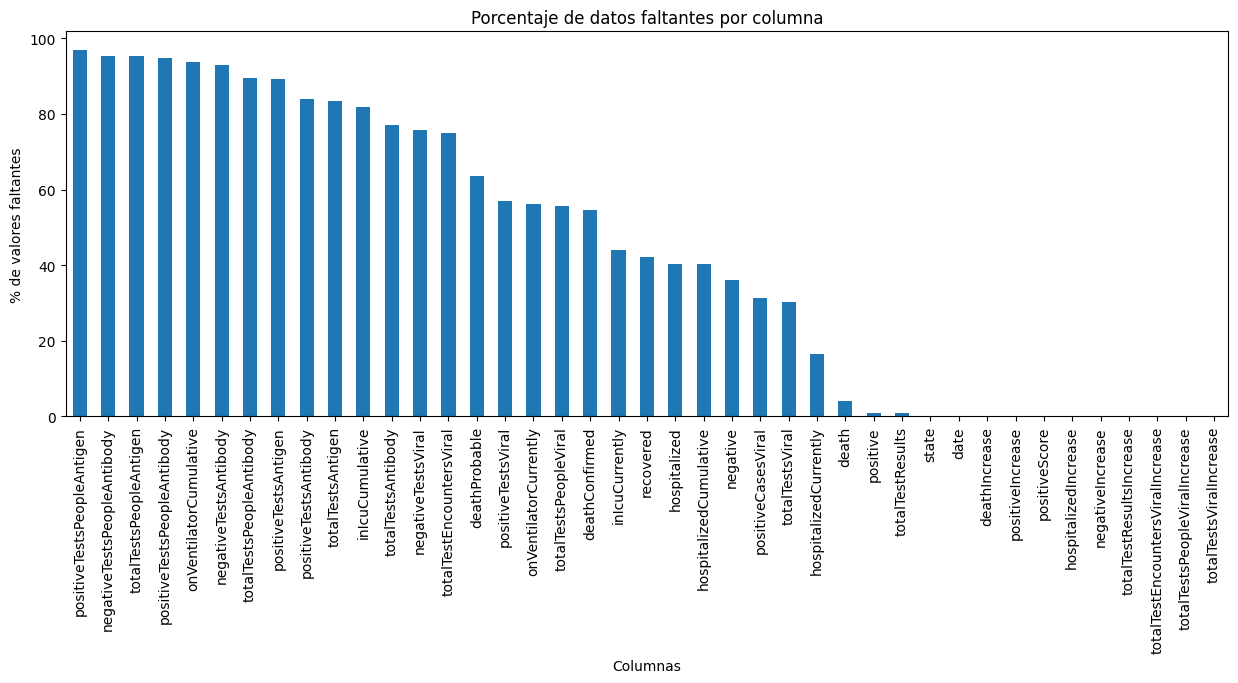

In [19]:
# Gráfico de barras con % de nulos
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(15,5))
missing_pct.plot(kind='bar')
plt.title("Porcentaje de datos faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.show()

<Axes: >

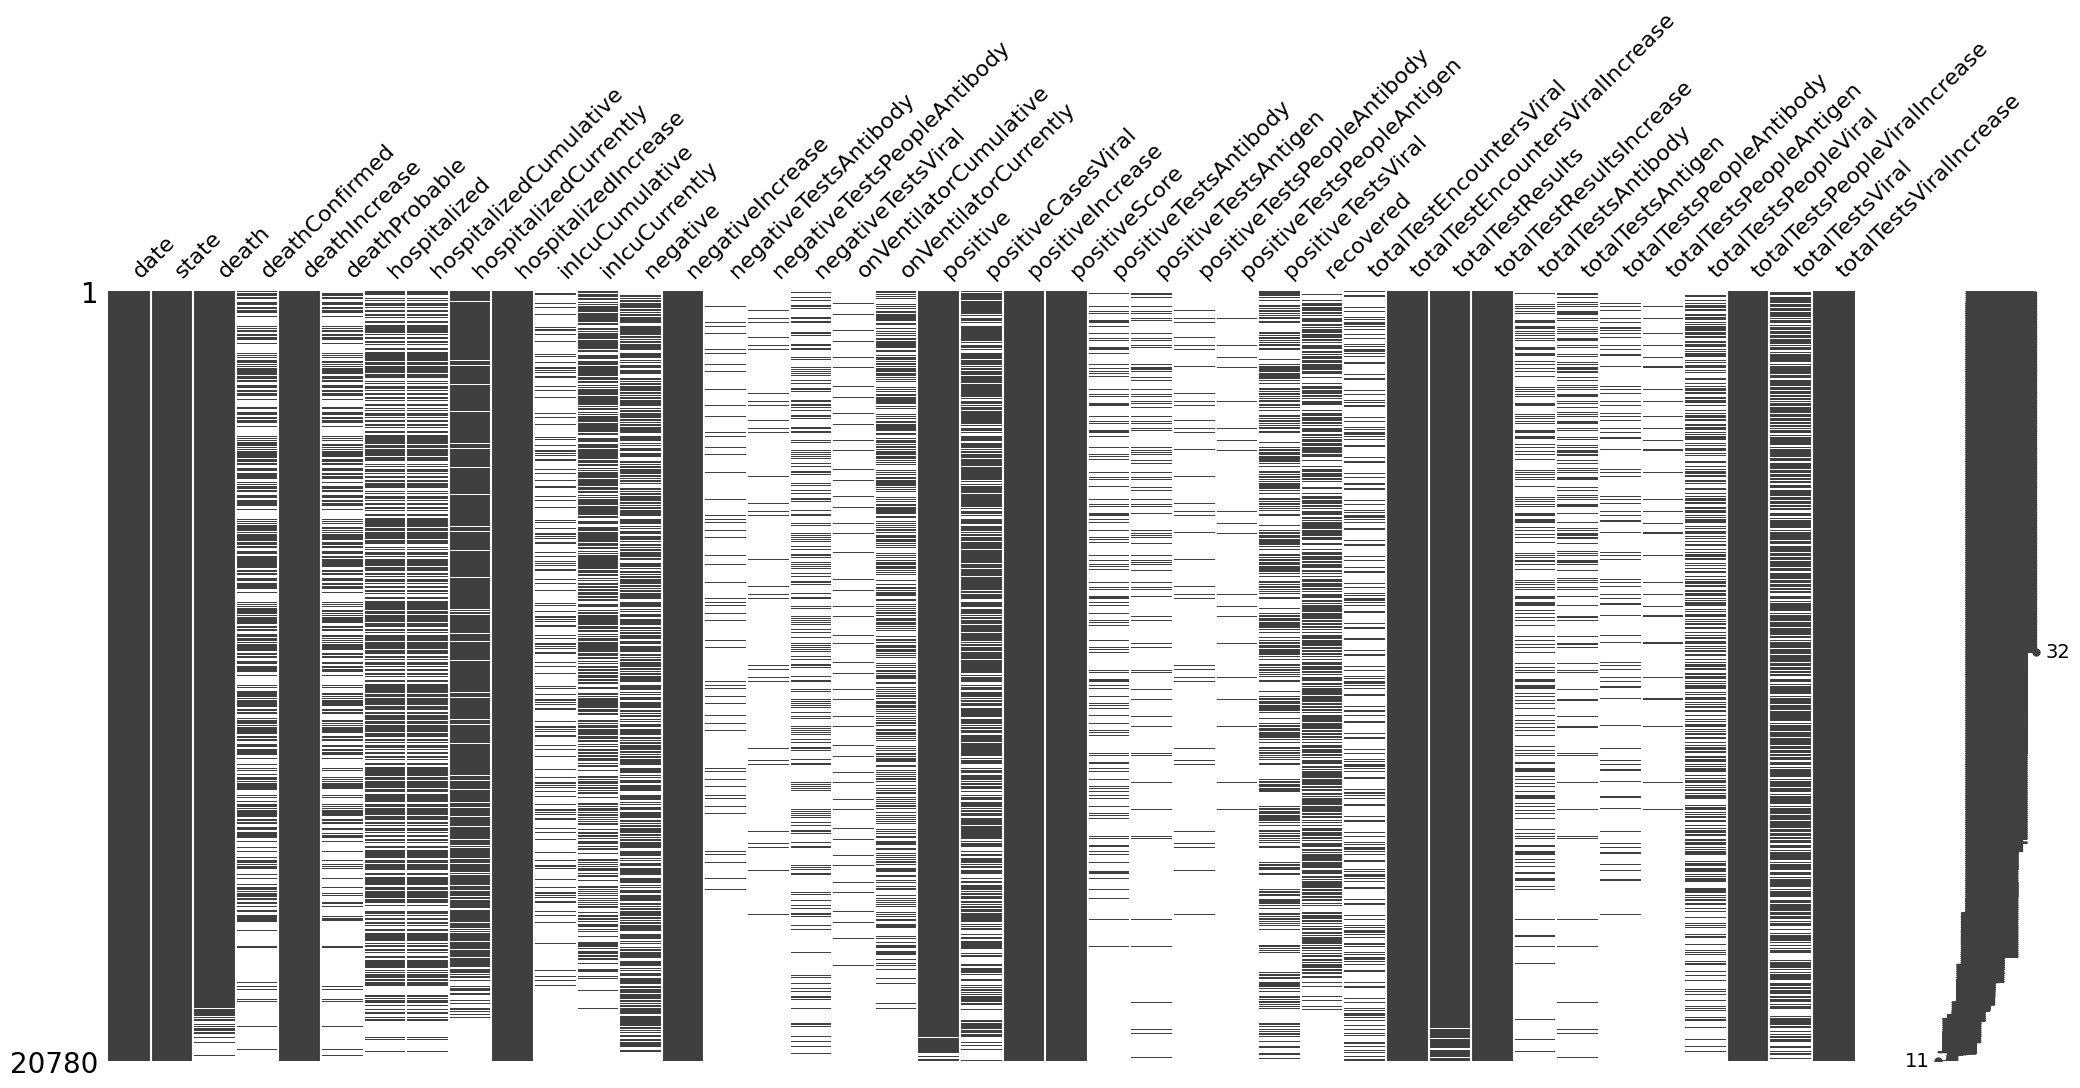

In [20]:
# Otra forma de verlo
msno.matrix(df)

<Axes: >

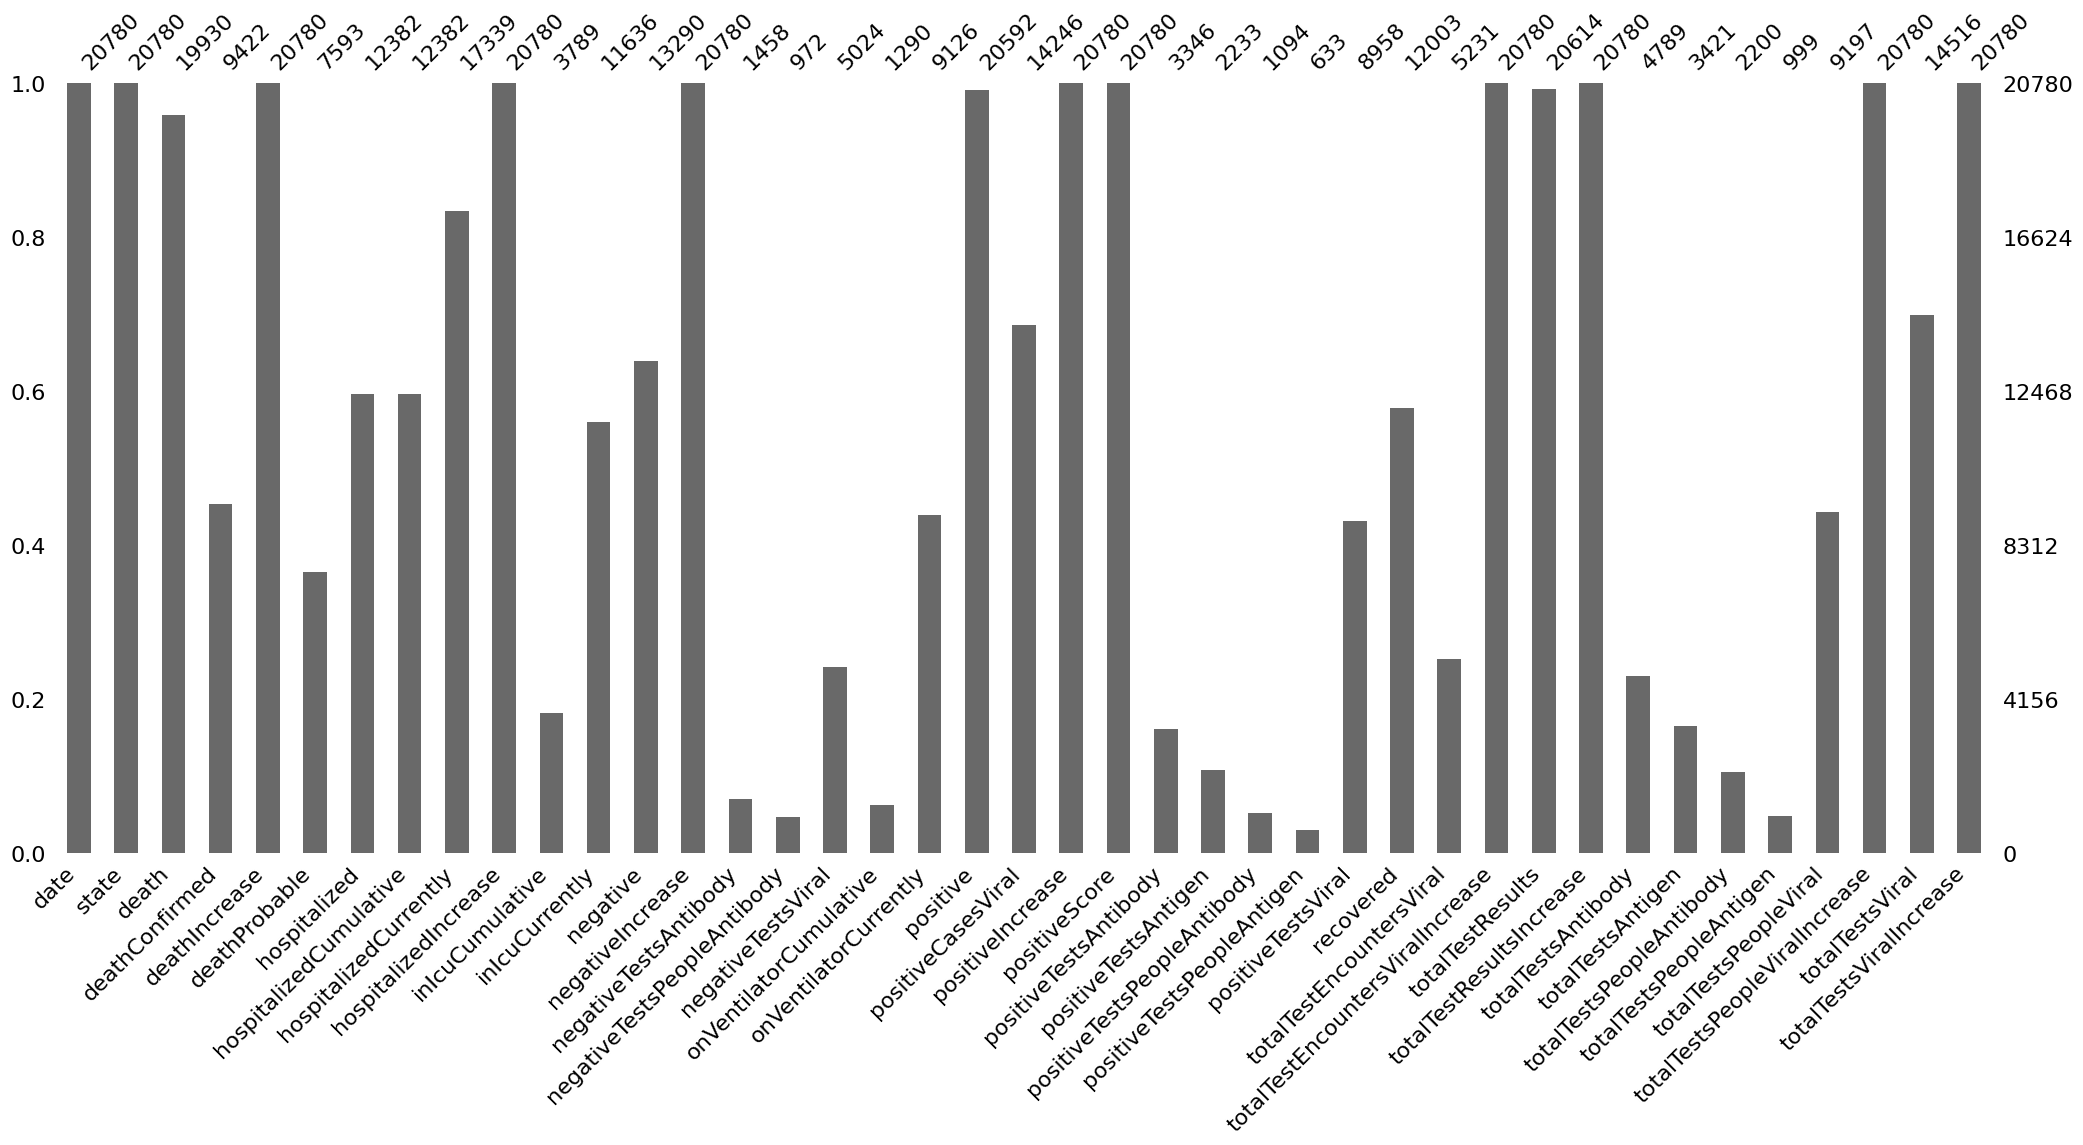

In [21]:
# Otra forma más de verlo
msno.bar(df)

# 🚀 Creo una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc.

## Descarto las columnas que creo NO aportan mucha información o información de valor, en este caso descarto las siguientes columnas:

#### *deathConfirmed, deathProbable, hospitalized, hospitalizedCumulative, inIcuCumulative, inIcuCurrently, negativeTestsAntibody, negativeTestsPeopleAntibody, negativeTestsViral, onVentilatorCumulative, onVentilatorCurrently, positiveTestsAntibody, positiveTestsAntigen, positiveTestsPeopleAntibody, positiveTestsPeopleAntigen, positiveTestsViral, totalTestEncountersViral, totalTestsAntibody, totalTestsAntigen, totalTestsPeopleAntibody, totalTestsPeopleAntigen y totalTestsPeopleViral* **porque tienen > 25% de valores nulos.**

#### Descarto la columna *positiveScore* porque todos sus valores son 0 y no aporta nada.

#### Descarto las columnas *totalTestEncountersViralIncrease* porque *totalTestEncountersViral* está descartada y la columna *totalTestsPeopleViralIncrease* porque *totalTestsPeopleViral* está descartada.

#### Aunque las columnas *hospitalizedCurrently, negative, recovered y totalTestsViral* tienen más de 25% de valores nulos o están cerca las mantengo porque las considero importantes para el informe ejecutivo que haré después.

In [22]:
# Selecciono las columnas con las que voy a trabajar
df_resumen = df[["date","state","death","deathIncrease","hospitalizedCurrently","hospitalizedIncrease","negative","negativeIncrease",
                 "positive","positiveIncrease","recovered","totalTestResults","totalTestResultsIncrease","totalTestsViral","totalTestsViralIncrease"]].copy()

# Vemos que ahora tenemos 15 columnas y no 41

In [23]:
df_resumen.shape

(20780, 15)

In [24]:
df_resumen.head(5)

date state    death  deathIncrease  hospitalizedCurrently  \
0  2021-03-07    AK    305.0              0                   33.0   
1  2021-03-07    AL  10148.0             -1                  494.0   
2  2021-03-07    AR   5319.0             22                  335.0   
3  2021-03-07    AS      0.0              0                    NaN   
4  2021-03-07    AZ  16328.0              5                  963.0   

   hospitalizedIncrease   negative  negativeIncrease  positive  \
0                     0        NaN                 0   56886.0   
1                     0  1931711.0              2087  499819.0   
2                    11  2480716.0              3267  324818.0   
3                     0     2140.0                 0       0.0   
4                    44  3073010.0             13678  826454.0   

   positiveIncrease  recovered  totalTestResults  totalTestResultsIncrease  \
0                 0        NaN         1731628.0                         0   
1               408   295690.0         2323788.0                      2347   
2               165   315517.0         2736442.0                      3380   
3                 0        NaN            2140.0                         0   
4              1335        NaN         7908105.0                     45110   

   totalTestsViral  totalTestsViralIncrease  
0        1731628.0                        0  
1              NaN                        0  
2        2736442.0                     3380  
3           2140.0                        0  
4        7908105.0                    45110

In [25]:
# Reviso los tipos de los datos para ver cuales debo transformar para trabajar mejor
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      20780 non-null  object 
 1   state                     20780 non-null  object 
 2   death                     19930 non-null  float64
 3   deathIncrease             20780 non-null  int64  
 4   hospitalizedCurrently     17339 non-null  float64
 5   hospitalizedIncrease      20780 non-null  int64  
 6   negative                  13290 non-null  float64
 7   negativeIncrease          20780 non-null  int64  
 8   positive                  20592 non-null  float64
 9   positiveIncrease          20780 non-null  int64  
 10  recovered                 12003 non-null  float64
 11  totalTestResults          20614 non-null  float64
 12  totalTestResultsIncrease  20780 non-null  int64  
 13  totalTestsViral           14516 non-null  float64
 14  totalT

In [26]:
# Convertir columna date a datetime
df_resumen['date'] = pd.to_datetime(df_resumen['date'])
# Creo la columna year
df_resumen['year'] = df_resumen['date'].dt.year
# Creo las columnas month y monthName
df_resumen['monthName'] = df_resumen['date'].dt.month_name()
df_resumen['month'] = df_resumen['date'].dt.month

In [27]:
# Compruebo las columnas recien creadas
df_resumen[['date', 'year', 'monthName', 'month']].sample(10)

date  year monthName  month
2475  2021-01-22  2021   January      1
14916 2020-06-14  2020      June      6
937   2021-02-19  2021  February      2
16365 2020-05-19  2020       May      5
14373 2020-06-24  2020      June      6
11292 2020-08-18  2020    August      8
14604 2020-06-20  2020      June      6
16790 2020-05-12  2020       May      5
20006 2020-03-15  2020     March      3
736   2021-02-22  2021  February      2

In [28]:
# Compruebo el tipo de la columna date
print(df_resumen['date'].dtype)

datetime64[ns]


In [29]:
# Convierto a string las columnas state y monthName de tipo Object
for col in df_resumen.columns:
    if df_resumen[col].dtype == 'object':
        df_resumen[col] = df_resumen[col].astype('string')

In [30]:
# Compruebo el cambio de tipo de dato
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20780 non-null  datetime64[ns]
 1   state                     20780 non-null  string        
 2   death                     19930 non-null  float64       
 3   deathIncrease             20780 non-null  int64         
 4   hospitalizedCurrently     17339 non-null  float64       
 5   hospitalizedIncrease      20780 non-null  int64         
 6   negative                  13290 non-null  float64       
 7   negativeIncrease          20780 non-null  int64         
 8   positive                  20592 non-null  float64       
 9   positiveIncrease          20780 non-null  int64         
 10  recovered                 12003 non-null  float64       
 11  totalTestResults          20614 non-null  float64       
 12  totalTestResultsIn

#### 📖 Creo un diccionario de nombres de estados y nivel de riqueza para visualizar mejor los datos que con códigos de 2 letras.
#### El nivel lo usare para ver gráficos por nivel de riqueza 

In [31]:
# Creo el diccionario

estados_usa = {
    "AL": {"nombre": "Alabama", "nivel": "Pobre"},
    "AK": {"nombre": "Alaska", "nivel": "Rico"},
    "AZ": {"nombre": "Arizona", "nivel": "Medio"},
    "AR": {"nombre": "Arkansas", "nivel": "Pobre"},
    "CA": {"nombre": "California", "nivel": "Rico"},
    "CO": {"nombre": "Colorado", "nivel": "Rico"},
    "CT": {"nombre": "Connecticut", "nivel": "Rico"},
    "DE": {"nombre": "Delaware", "nivel": "Medio"},
    "FL": {"nombre": "Florida", "nivel": "Medio"},
    "GA": {"nombre": "Georgia", "nivel": "Medio"},
    "HI": {"nombre": "Hawái", "nivel": "Rico"},
    "ID": {"nombre": "Idaho", "nivel": "Medio"},
    "IL": {"nombre": "Illinois", "nivel": "Medio"},
    "IN": {"nombre": "Indiana", "nivel": "Medio"},
    "IA": {"nombre": "Iowa", "nivel": "Medio"},
    "KS": {"nombre": "Kansas", "nivel": "Medio"},
    "KY": {"nombre": "Kentucky", "nivel": "Pobre"},
    "LA": {"nombre": "Luisiana", "nivel": "Pobre"},
    "ME": {"nombre": "Maine", "nivel": "Medio"},
    "MD": {"nombre": "Maryland", "nivel": "Rico"},
    "MA": {"nombre": "Massachusetts", "nivel": "Rico"},
    "MI": {"nombre": "Michigan", "nivel": "Medio"},
    "MN": {"nombre": "Minnesota", "nivel": "Rico"},
    "MS": {"nombre": "Misisipi", "nivel": "Pobre"},
    "MO": {"nombre": "Misuri", "nivel": "Medio"},
    "MT": {"nombre": "Montana", "nivel": "Medio"},
    "NE": {"nombre": "Nebraska", "nivel": "Medio"},
    "NV": {"nombre": "Nevada", "nivel": "Medio"},
    "NH": {"nombre": "Nuevo Hampshire", "nivel": "Rico"},
    "NJ": {"nombre": "Nueva Jersey", "nivel": "Rico"},
    "NM": {"nombre": "Nuevo México", "nivel": "Pobre"},
    "NY": {"nombre": "Nueva York", "nivel": "Rico"},
    "NC": {"nombre": "Carolina del Norte", "nivel": "Medio"},
    "ND": {"nombre": "Dakota del Norte", "nivel": "Medio"},
    "OH": {"nombre": "Ohio", "nivel": "Medio"},
    "OK": {"nombre": "Oklahoma", "nivel": "Pobre"},
    "OR": {"nombre": "Oregón", "nivel": "Medio"},
    "PA": {"nombre": "Pensilvania", "nivel": "Medio"},
    "RI": {"nombre": "Rhode Island", "nivel": "Medio"},
    "SC": {"nombre": "Carolina del Sur", "nivel": "Pobre"},
    "SD": {"nombre": "Dakota del Sur", "nivel": "Medio"},
    "TN": {"nombre": "Tennessee", "nivel": "Medio"},
    "TX": {"nombre": "Texas", "nivel": "Medio"},
    "UT": {"nombre": "Utah", "nivel": "Rico"},
    "VT": {"nombre": "Vermont", "nivel": "Medio"},
    "VA": {"nombre": "Virginia", "nivel": "Rico"},
    "WA": {"nombre": "Washington", "nivel": "Rico"},
    "WV": {"nombre": "Virginia Occidental", "nivel": "Pobre"},
    "WI": {"nombre": "Wisconsin", "nivel": "Medio"},
    "WY": {"nombre": "Wyoming", "nivel": "Medio"},
    "DC": {"nombre": "Columbia", "nivel": "Rico"},
    "GU": {"nombre": "Guam", "nivel": "Medio"},
    "MP": {"nombre": "Islas Marianas", "nivel": "Medio"},
    "PR": {"nombre": "Puerto Rico", "nivel": "Pobre"},
    "VI": {"nombre": "Islas Virgenes", "nivel": "Rico"},
    "AS": {"nombre": "Samoa Americana", "nivel": "Pobre"}
}

# Ejemplo: consultar nivel de Texas por su sigla
print(estados_usa["TX"]["nivel"]) # Salida: Medio

Medio


### Introduzco las columnas *stateName* con el nombre del estado y *stateLevel* con el nivel de riqueza

In [32]:
def level(state):
    if estados_usa[state]: return estados_usa[state]['nivel']
    else: return 'Sin Level'

def name(state):
    #if state == 'AK': return 'Arkansas'
    if estados_usa[state]: return estados_usa[state]['nombre']
    else: return 'Sin Estado'

df_resumen['stateName'] = df_resumen['state'].apply(name)
df_resumen['stateLevel'] = df_resumen['state'].apply(level)

In [33]:
# Compruebo las columnas recien creadas
df_resumen[['state', 'stateName', 'stateLevel']].head(10)

state        stateName stateLevel
0    AK           Alaska       Rico
1    AL          Alabama      Pobre
2    AR         Arkansas      Pobre
3    AS  Samoa Americana      Pobre
4    AZ          Arizona      Medio
5    CA       California       Rico
6    CO         Colorado       Rico
7    CT      Connecticut       Rico
8    DC         Columbia       Rico
9    DE         Delaware      Medio

In [34]:
# Convierto a string las columnas stateName y stateLevel de tipo Object
for col in df_resumen.columns:
    if df_resumen[col].dtype == 'object':
        df_resumen[col] = df_resumen[col].astype('string')

# Verificamos finalmente el tipo de datos de las columnas

In [35]:
df_resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20780 non-null  datetime64[ns]
 1   state                     20780 non-null  string        
 2   death                     19930 non-null  float64       
 3   deathIncrease             20780 non-null  int64         
 4   hospitalizedCurrently     17339 non-null  float64       
 5   hospitalizedIncrease      20780 non-null  int64         
 6   negative                  13290 non-null  float64       
 7   negativeIncrease          20780 non-null  int64         
 8   positive                  20592 non-null  float64       
 9   positiveIncrease          20780 non-null  int64         
 10  recovered                 12003 non-null  float64       
 11  totalTestResults          20614 non-null  float64       
 12  totalTestResultsIn

### Poner los NaN a cero. Considero que los datos NaN significa que no hay casos y no han introducido datos.

In [36]:
df_resumen.fillna(0, inplace=True)

# 🤓 Visualización de Datos

In [37]:
df_resumen.sample(10)

date state   death  deathIncrease  hospitalizedCurrently  \
13120 2020-07-16    IL  7452.0             25                 1434.0   
15285 2020-06-08    WI   646.0             -1                  322.0   
16903 2020-05-10    TX  1088.0             39                 1626.0   
19304 2020-03-28    OR    12.0              1                   91.0   
14591 2020-06-20    ND    82.0              0                   28.0   
6204  2020-11-17    SC  4156.0             13                  800.0   
8105  2020-10-14    PA  8411.0             27                  749.0   
5551  2020-11-28    CT  4961.0              0                 1017.0   
12551 2020-07-26    CT  4413.0              0                   71.0   
14918 2020-06-14    MD  2939.0             13                  751.0   

       hospitalizedIncrease   negative  negativeIncrease  positive  \
13120                     0        0.0                 0  159082.0   
15285                    12   333253.0              7386   23434.0   
16903                     0        0.0                 0   38869.0   
19304                    12     8510.0              1557     414.0   
14591                     3    90980.0              1600    3246.0   
6204                     62  1924423.0             15507  197900.0   
8105                      0  2074729.0             14636  175922.0   
5551                      0        0.0                 0  112581.0   
12551                     0        0.0                 0   48776.0   
14918                   112   353608.0              6155   61701.0   

       positiveIncrease  recovered  totalTestResults  \
13120              1257        0.0         2122607.0   
15285               222    14242.0          434433.0   
16903              1009    21022.0          572676.0   
19304                87        0.0               0.0   
14591                25     2882.0          148824.0   
6204               1283   103154.0         2122323.0   
8105               1276   140737.0         3506849.0   
5551                  0        0.0         3566430.0   
12551                 0     8516.0          794909.0   
14918               396     4541.0          486599.0   

       totalTestResultsIncrease  totalTestsViral  totalTestsViralIncrease  \
13120                     43006        2122607.0                    43006   
15285                      8378              0.0                        0   
16903                     12667         572676.0                    12667   
19304                         0              0.0                        0   
14591                      3896         152005.0                     3943   
6204                      16790        2110951.0                    16645   
8105                      30438              0.0                        0   
5551                      30037        3566430.0                    30037   
12551                      5405         794909.0                     5405   
14918                      8480         486599.0                     8480   

       year monthName  month         stateName stateLevel  
13120  2020      July      7          Illinois      Medio  
15285  2020      June      6         Wisconsin      Medio  
16903  2020       May      5             Texas      Medio  
19304  2020     March      3            Oregón      Medio  
14591  2020      June      6  Dakota del Norte      Medio  
6204   2020  November     11  Carolina del Sur      Pobre  
8105   2020   October     10       Pensilvania      Medio  
5551   2020  November     11       Connecticut       Rico  
12551  2020      July      7       Connecticut       Rico  
14918  2020      June      6          Maryland       Rico

# 💉 Histograma

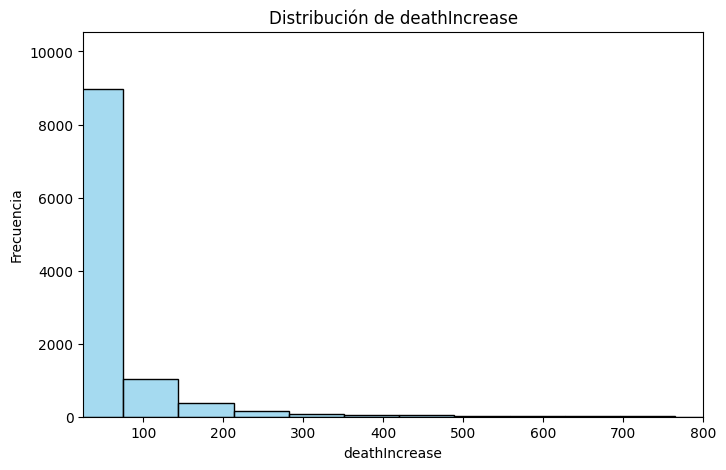

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df_resumen['deathIncrease'], bins=40, kde=False, color='skyblue')
plt.title("Distribución de deathIncrease")
plt.xlabel("deathIncrease")
plt.ylabel("Frecuencia")
plt.xlim(25, 800)
plt.show()
# Hay casi 8500 lineas con entre 0 y 70 muertes diarias

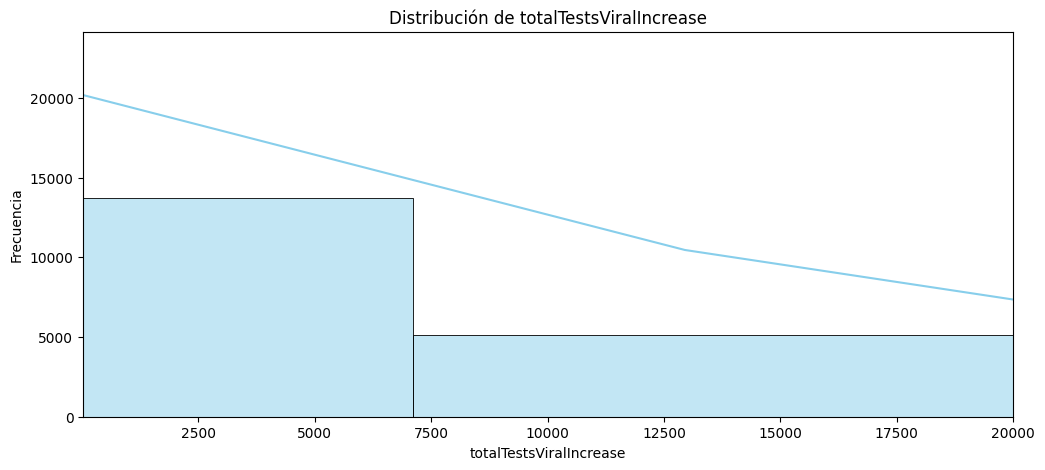

In [39]:
plt.figure(figsize=(12,5))
sns.histplot(df_resumen['totalTestsViralIncrease'], bins=100, kde=True, color='skyblue')
plt.title("Distribución de totalTestsViralIncrease")
plt.xlabel("totalTestsViralIncrease")
plt.ylabel("Frecuencia")
plt.xlim(25, 20000)
plt.show()

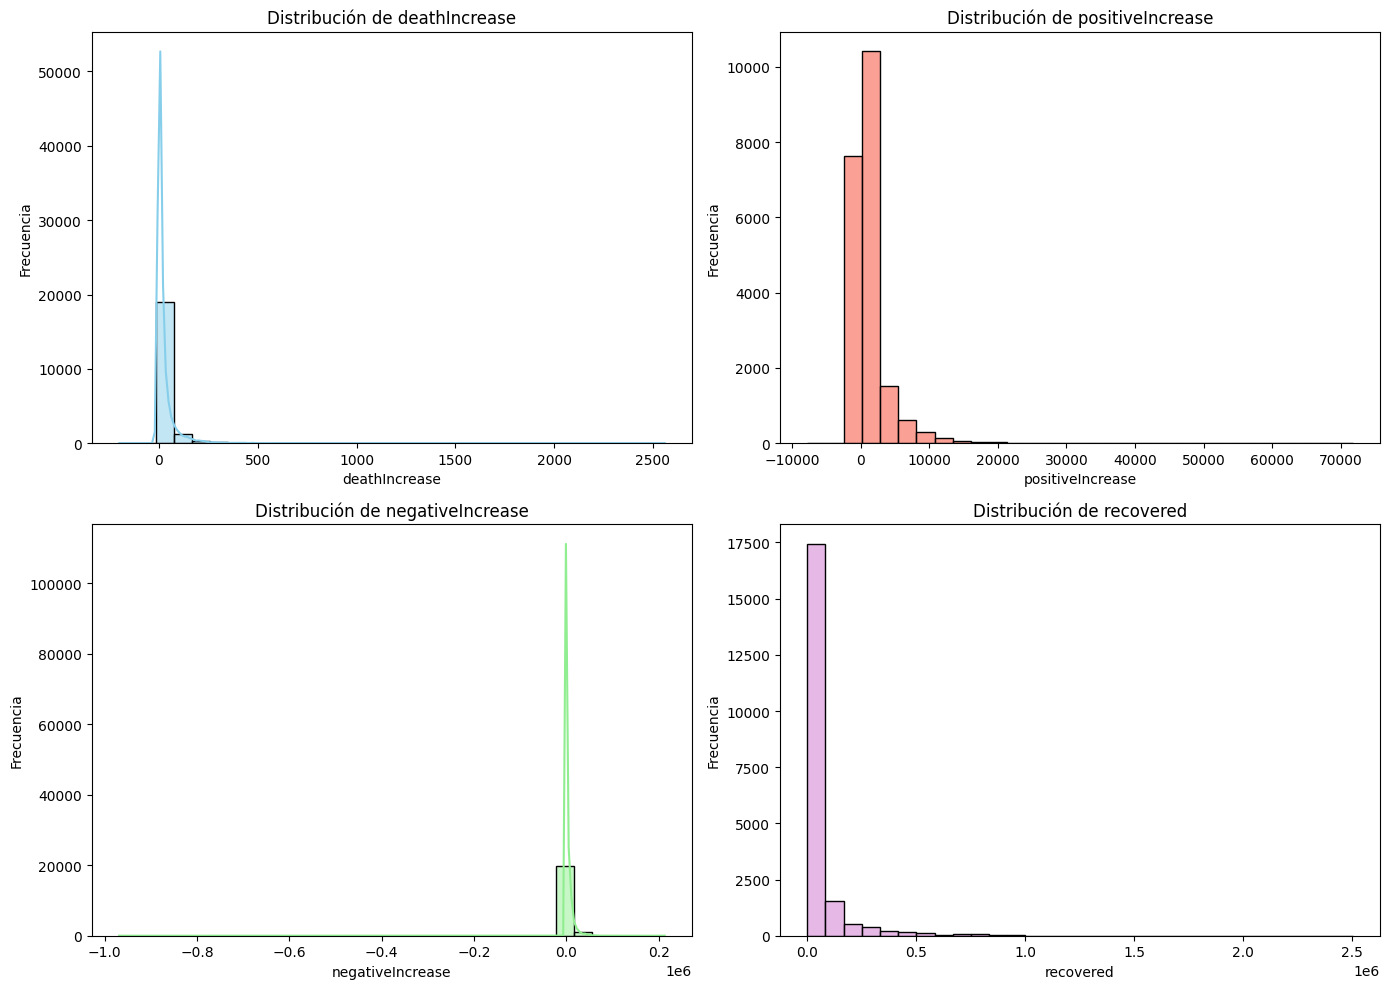

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Loan Amount
sns.histplot(df_resumen['deathIncrease'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de deathIncrease')
axes[0].set_xlabel('deathIncrease')
axes[0].set_ylabel('Frecuencia')

# Funded Amount
sns.histplot(df_resumen['positiveIncrease'], bins=30, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de positiveIncrease')
axes[1].set_xlabel('positiveIncrease')
axes[1].set_ylabel('Frecuencia')

# Term in Months
sns.histplot(df_resumen['negativeIncrease'], bins=30, kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Distribución de negativeIncrease')
axes[2].set_xlabel('negativeIncrease')
axes[2].set_ylabel('Frecuencia')

# Lender Count
sns.histplot(df_resumen['recovered'], bins=30, kde=False, color='plum', ax=axes[3])
axes[3].set_title('Distribución de recovered')
axes[3].set_xlabel('recovered')
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 📊 Gráfico de barras:

- Para datos discretos como estados y nivel de riqueza

Index(['California', 'Texas', 'Nueva York', 'Florida', 'Pensilvania',
       'Nueva Jersey', 'Illinois', 'Georgia', 'Ohio', 'Michigan'],
      dtype='string', name='stateName')
[54124 44451 39029 32266 24349 23574 23014 17906 17656 16658]


/tmp/ipython-input-1494701861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')


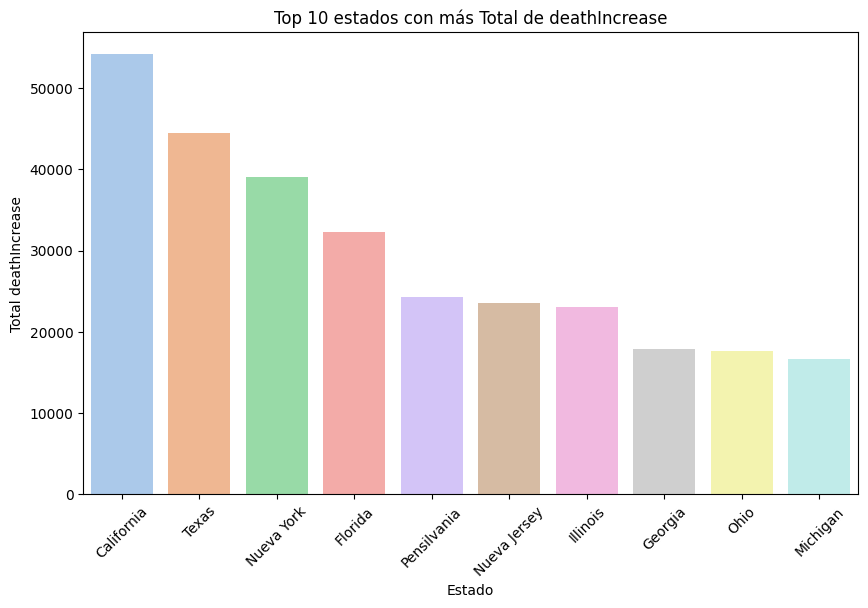

In [41]:
state_totals = df_resumen.groupby('stateName')['deathIncrease'].sum().sort_values(ascending=False).head(10)

print(state_totals.index)
print(state_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')
plt.title("Top 10 estados con más Total de deathIncrease")
plt.xlabel("Estado")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Samoa Americana', 'Islas Marianas', 'Islas Virgenes', 'Guam',
       'Vermont', 'Alaska', 'Hawái', 'Wyoming', 'Maine', 'Columbia'],
      dtype='string', name='stateName')
[   0    2   25  133  208  305  445  682  706 1030]


/tmp/ipython-input-3319249714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')


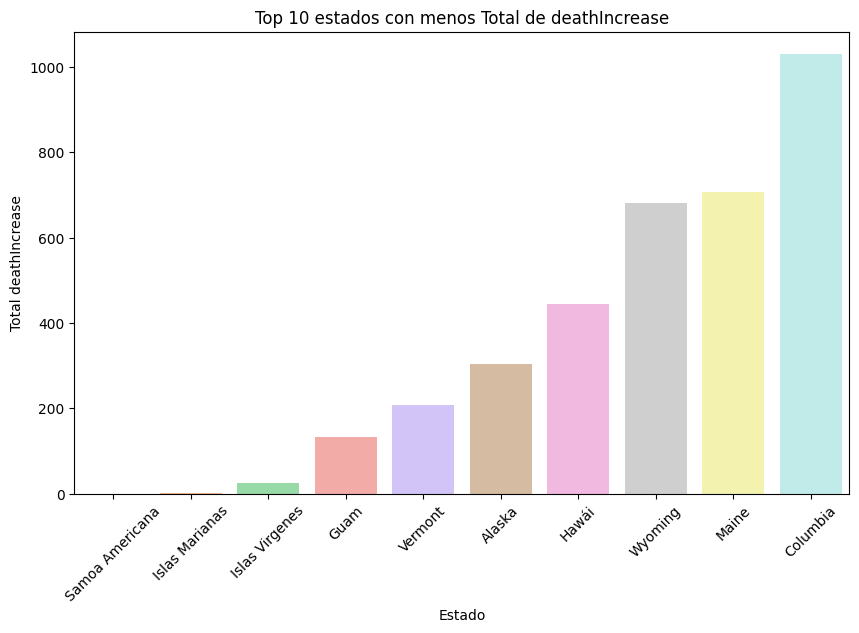

In [42]:
state_totals = df_resumen.groupby('stateName')['deathIncrease'].sum().sort_values(ascending=True).head(10)

print(state_totals.index)
print(state_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='pastel')
plt.title("Top 10 estados con menos Total de deathIncrease")
plt.xlabel("Estado")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Medio', 'Rico', 'Pobre'], dtype='string', name='stateLevel')
[275882 180944  58325]


/tmp/ipython-input-3945740306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')


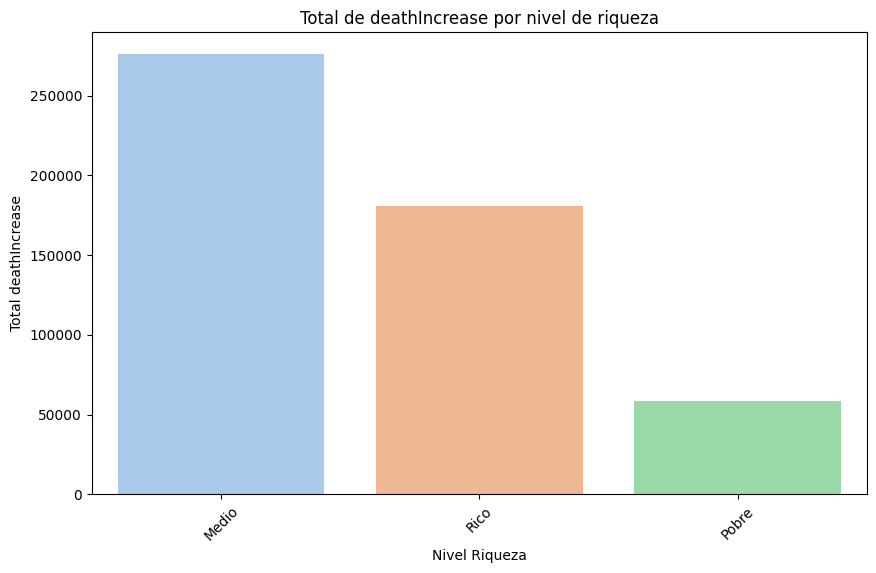

In [43]:
state_level_totals = df_resumen.groupby('stateLevel')['deathIncrease'].sum().sort_values(ascending=False)

print(state_level_totals.index)
print(state_level_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')
plt.title("Total de deathIncrease por nivel de riqueza")
plt.xlabel("Nivel Riqueza")
plt.ylabel("Total deathIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Index(['Medio', 'Rico', 'Pobre'], dtype='string', name='stateLevel')
[143124979  98131285  28082187]


/tmp/ipython-input-2371430505.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')


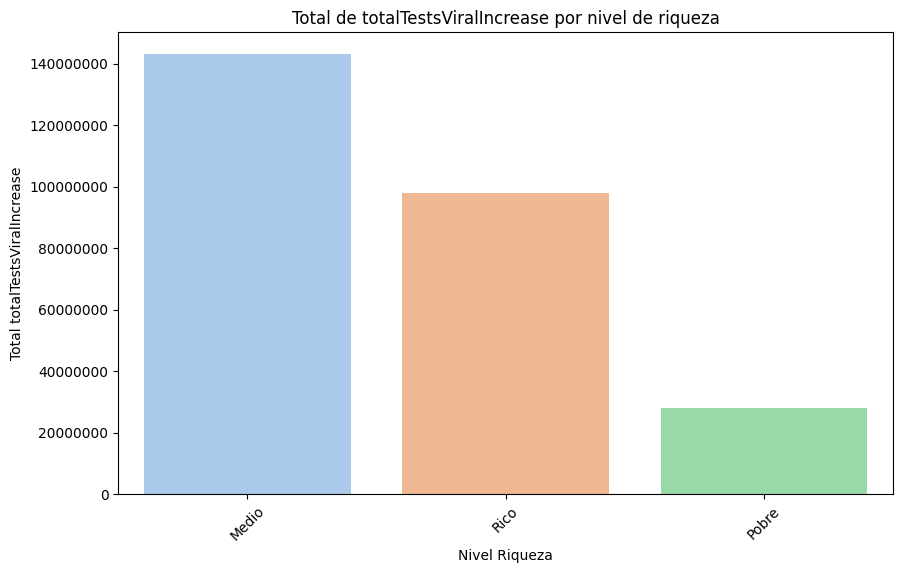

In [44]:
state_level_totals = df_resumen.groupby('stateLevel')['totalTestsViralIncrease'].sum().sort_values(ascending=False)

print(state_level_totals.index)
print(state_level_totals.values)

plt.figure(figsize=(10,6))
sns.barplot(x=state_level_totals.index, y=state_level_totals.values, palette='pastel')
plt.title("Total de totalTestsViralIncrease por nivel de riqueza")
plt.xlabel("Nivel Riqueza")
plt.ylabel("Total totalTestsViralIncrease")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

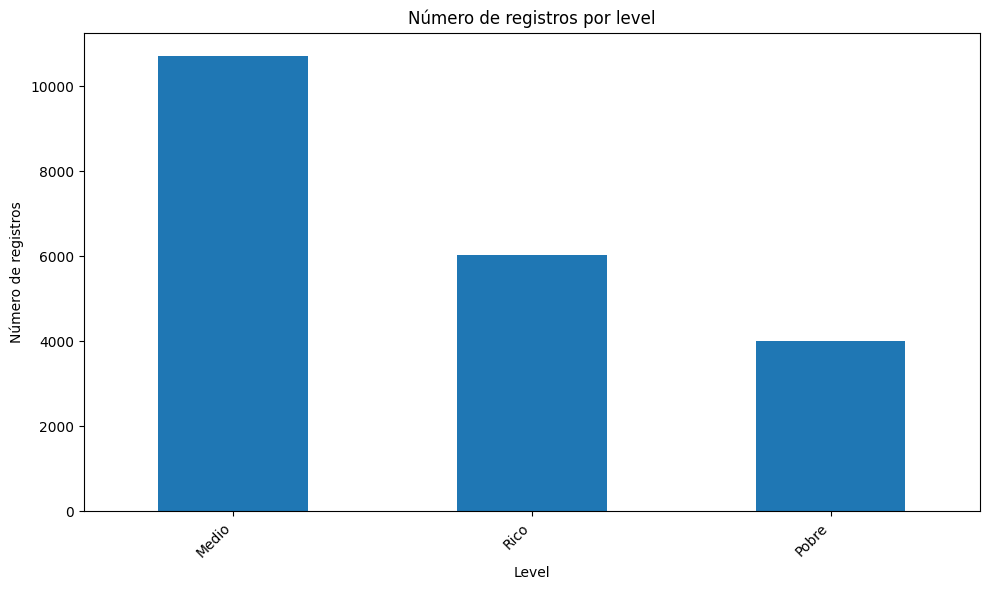

In [45]:
count_by_level = df_resumen['stateLevel'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
count_by_level.plot(kind='bar')
plt.title('Número de registros por level')
plt.xlabel('Level')
plt.ylabel('Número de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2071302584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')


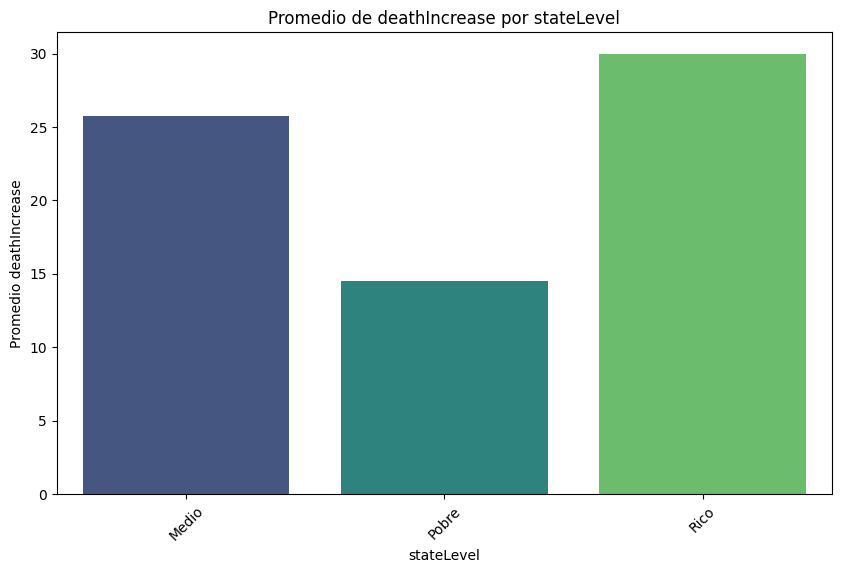

In [46]:
# Agrupar por stateLevel y calcular promedio de death
agg = df_resumen.groupby('stateLevel')['deathIncrease'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')
plt.title("Promedio de deathIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Promedio deathIncrease")
plt.xticks(rotation=45)
plt.show()

# 📈 Gráfico de líneas:

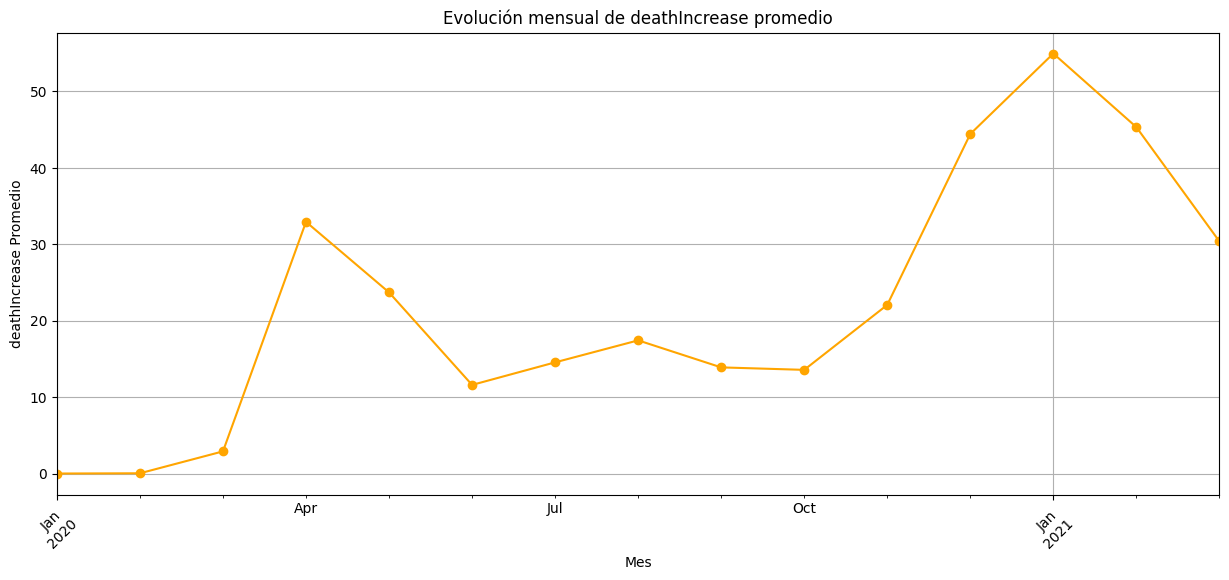

In [47]:
# Tendencia estacional de deathIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['deathIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de deathIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("deathIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

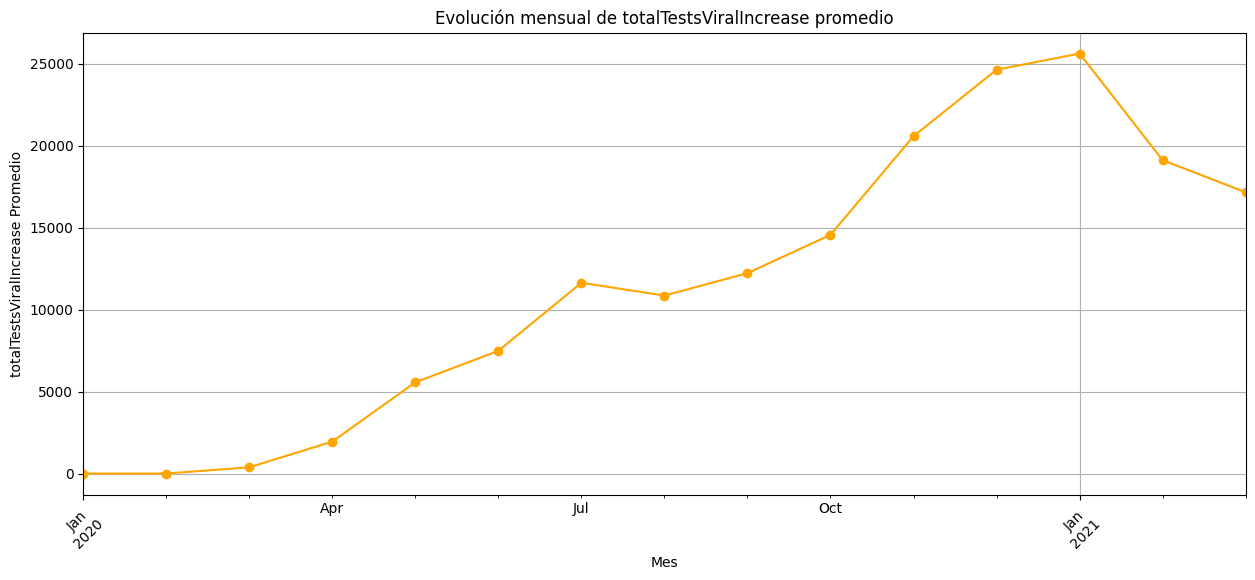

In [48]:
# Tendencia estacional de totalTestsViralIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['totalTestsViralIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de totalTestsViralIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("totalTestsViralIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

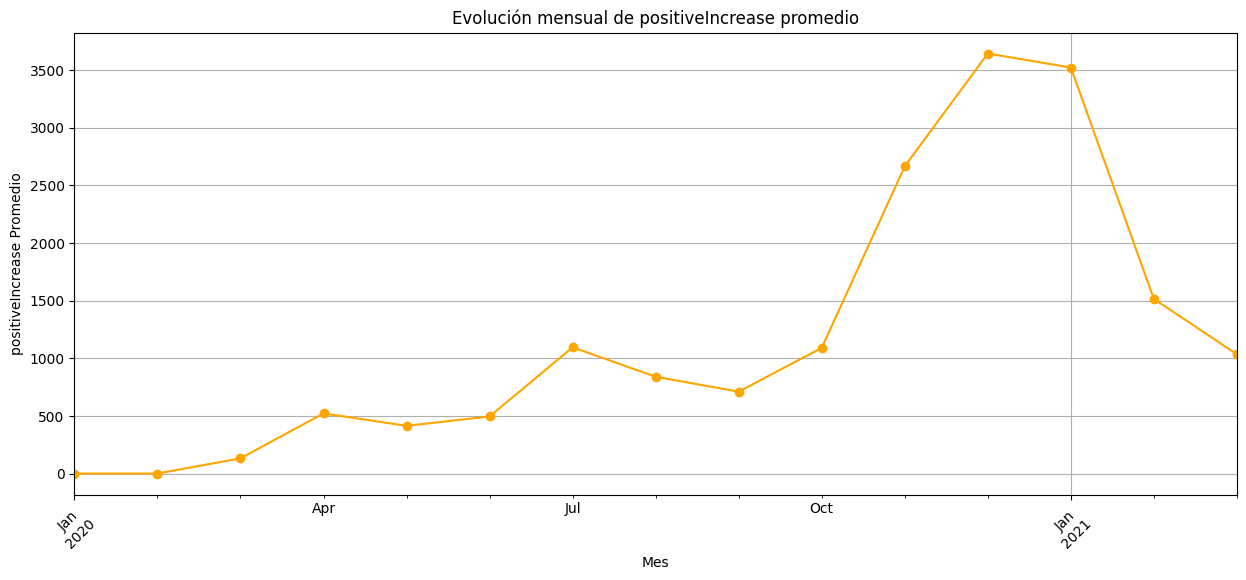

In [49]:
# Tendencia estacional de positiveIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['positiveIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de positiveIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("positiveIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

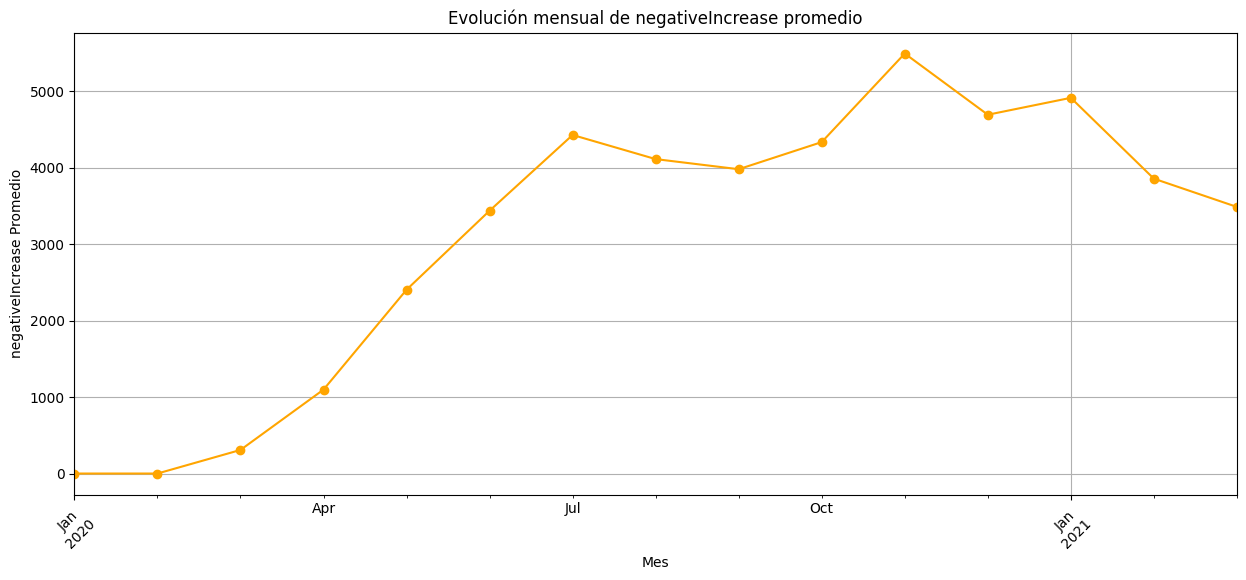

In [50]:
# Tendencia estacional de negativeIncrease
df_resumen['mes'] = df_resumen['date'].dt.to_period('M')
monthly_avg = df_resumen.groupby('mes')['negativeIncrease'].mean()

plt.figure(figsize=(15,6))
monthly_avg.plot(marker='o', color='orange')
plt.title("Evolución mensual de negativeIncrease promedio")
plt.xlabel("Mes")
plt.ylabel("negativeIncrease Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 💡 Pie chart

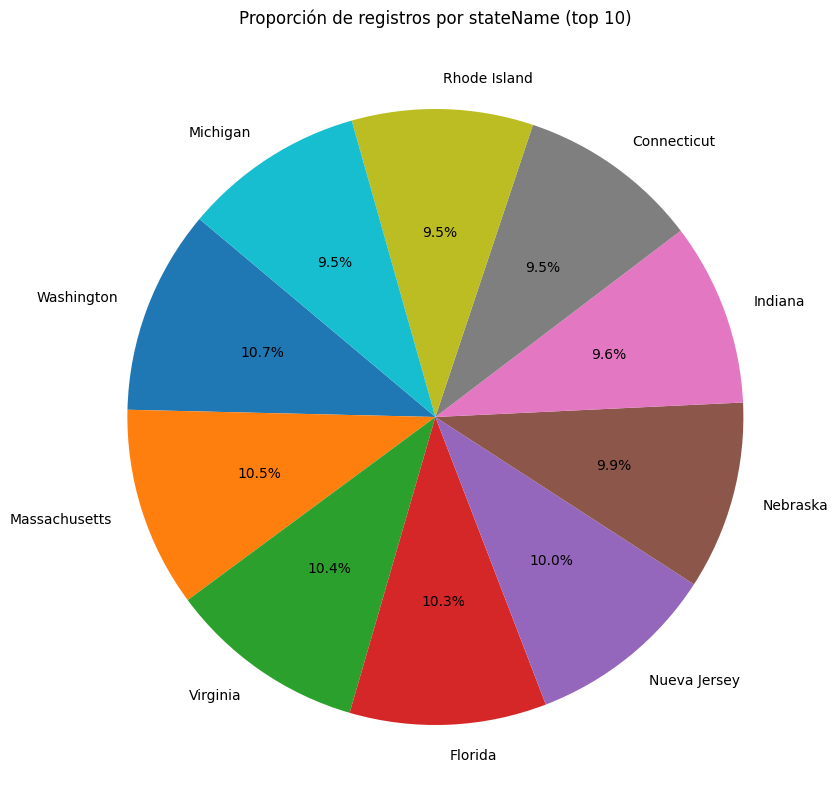

In [51]:
top_states = df_resumen['stateName'].value_counts().nlargest(10)
plt.figure(figsize=(10,10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de registros por stateName (top 10)')
plt.show()

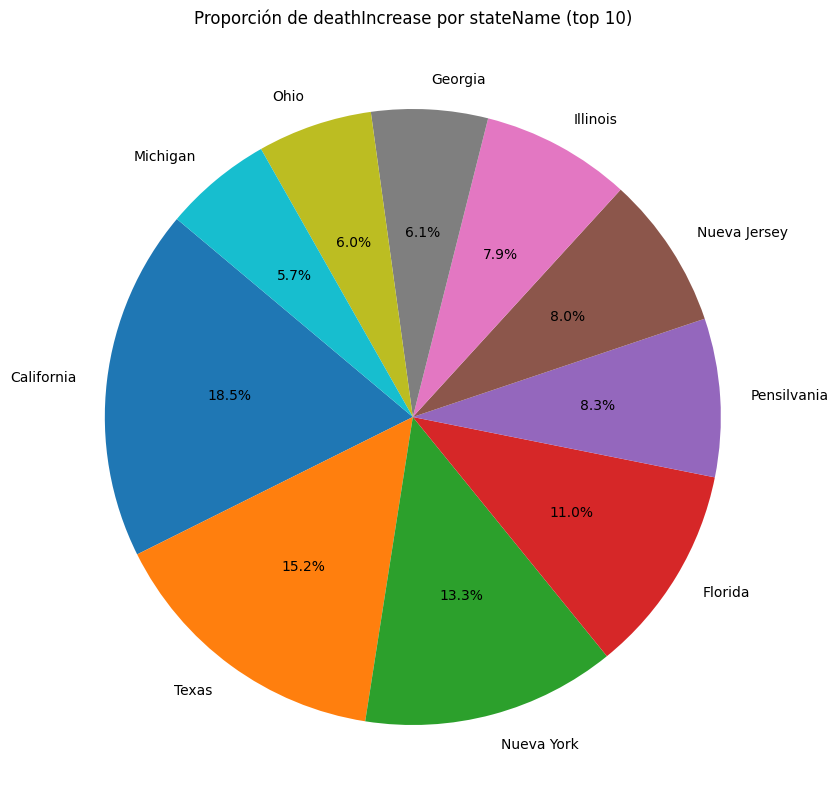

In [52]:
top_states = df_resumen.groupby('stateName')['deathIncrease'].sum().nlargest(10)
plt.figure(figsize=(10,10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de deathIncrease por stateName (top 10)')
plt.show()

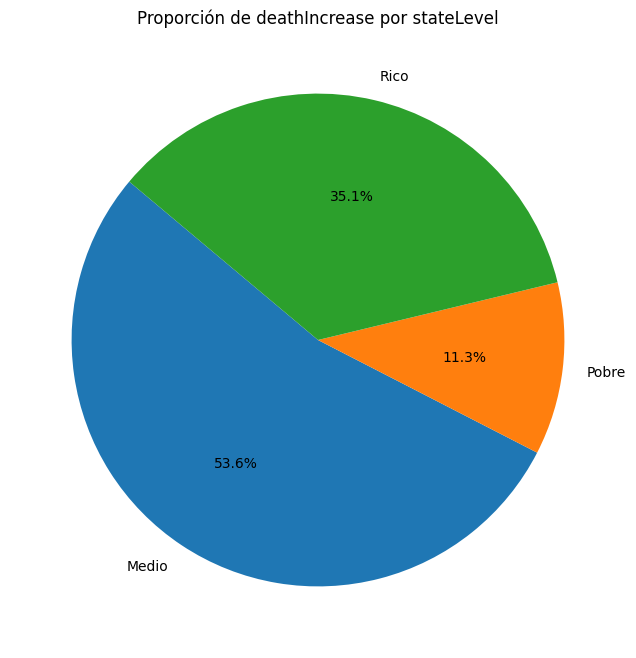

In [53]:
top_states = df_resumen.groupby('stateLevel')['deathIncrease'].sum()
plt.figure(figsize=(8,8))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de deathIncrease por stateLevel')
plt.show()

# 🗽 Muertes totales en EEUU por covid = 515 151 personas

In [54]:
total_death = df_resumen['deathIncrease'].sum()
print("Total de muertes en USA por covid19 -> ",total_death)

Total de muertes en USA por covid19 ->  515151


/tmp/ipython-input-2315026062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateName', y='deathIncrease', data=agg, palette='viridis')


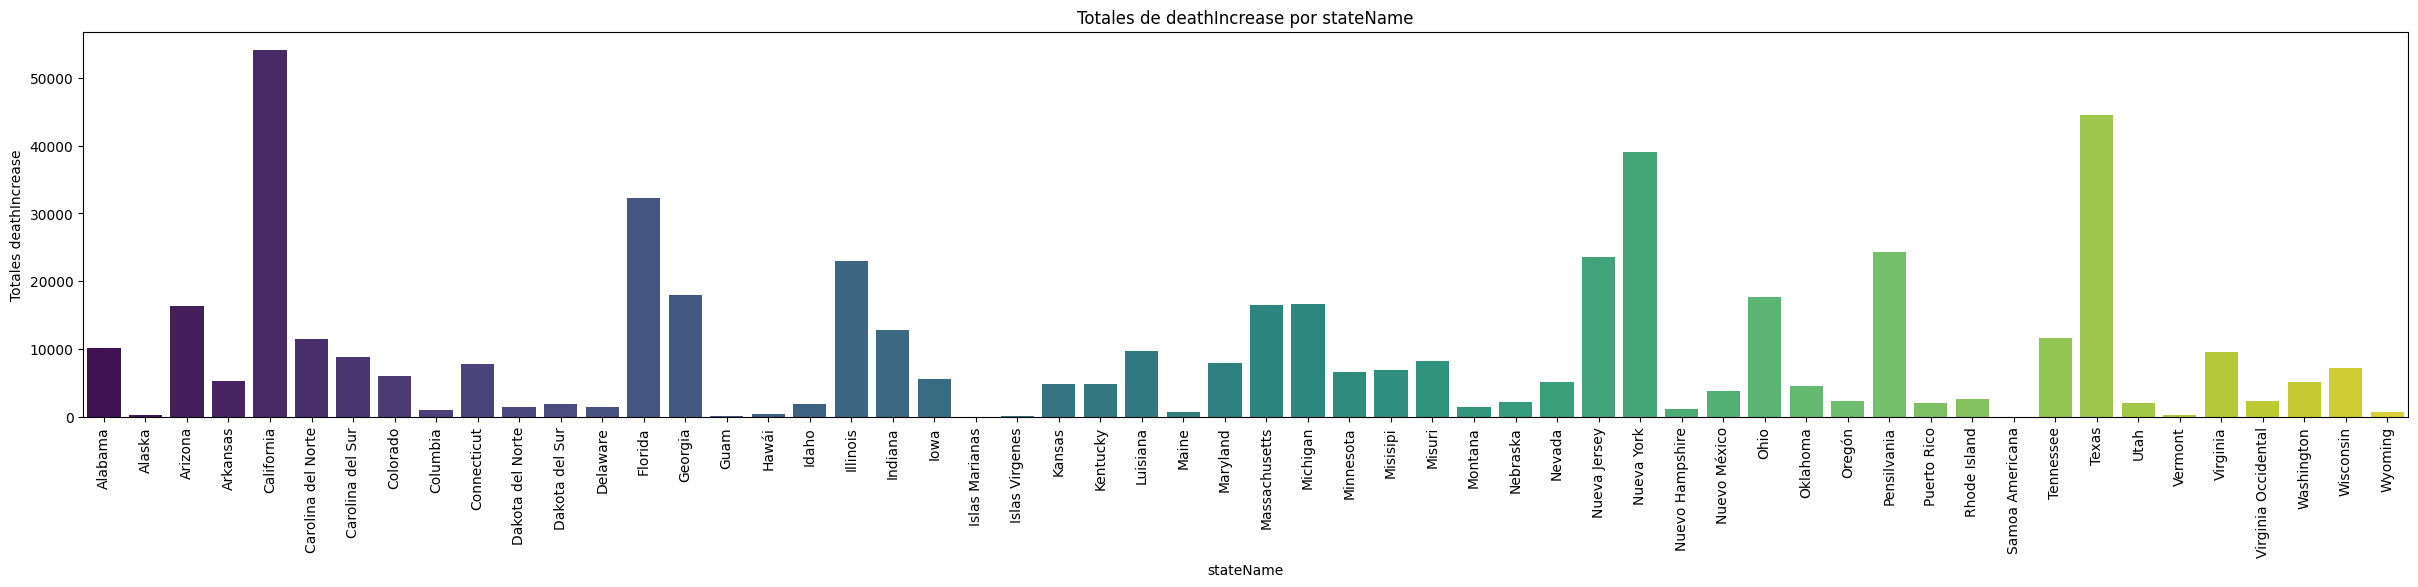

In [55]:
# Agrupar por stateName y calcular suma de deathIncrease
agg = df_resumen.groupby('stateName')['deathIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(30,5))
sns.barplot(x='stateName', y='deathIncrease', data=agg, palette='viridis')
plt.title("Totales de deathIncrease por stateName")
plt.xlabel("stateName")
plt.ylabel("Totales deathIncrease")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3177137325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateName', y='totalTestsViralIncrease', data=agg, palette='viridis')


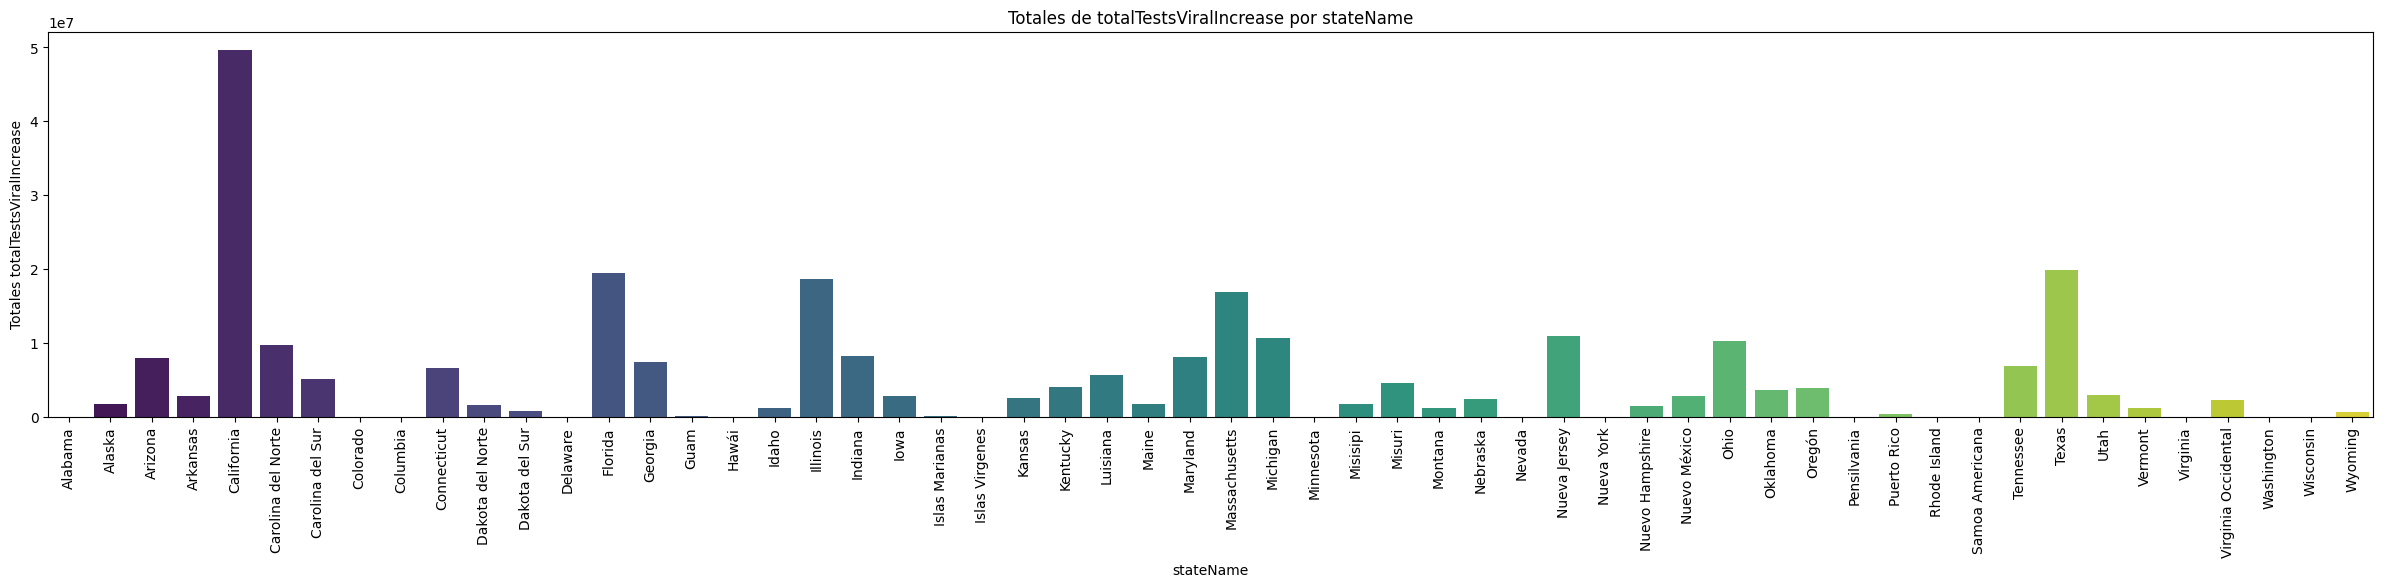

In [56]:
# Agrupar por stateName y calcular suma de totalTestsViralIncrease
agg = df_resumen.groupby('stateName')['totalTestsViralIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(30,5))
sns.barplot(x='stateName', y='totalTestsViralIncrease', data=agg, palette='viridis')
plt.title("Totales de totalTestsViralIncrease por stateName")
plt.xlabel("stateName")
plt.ylabel("Totales totalTestsViralIncrease")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-103461925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')


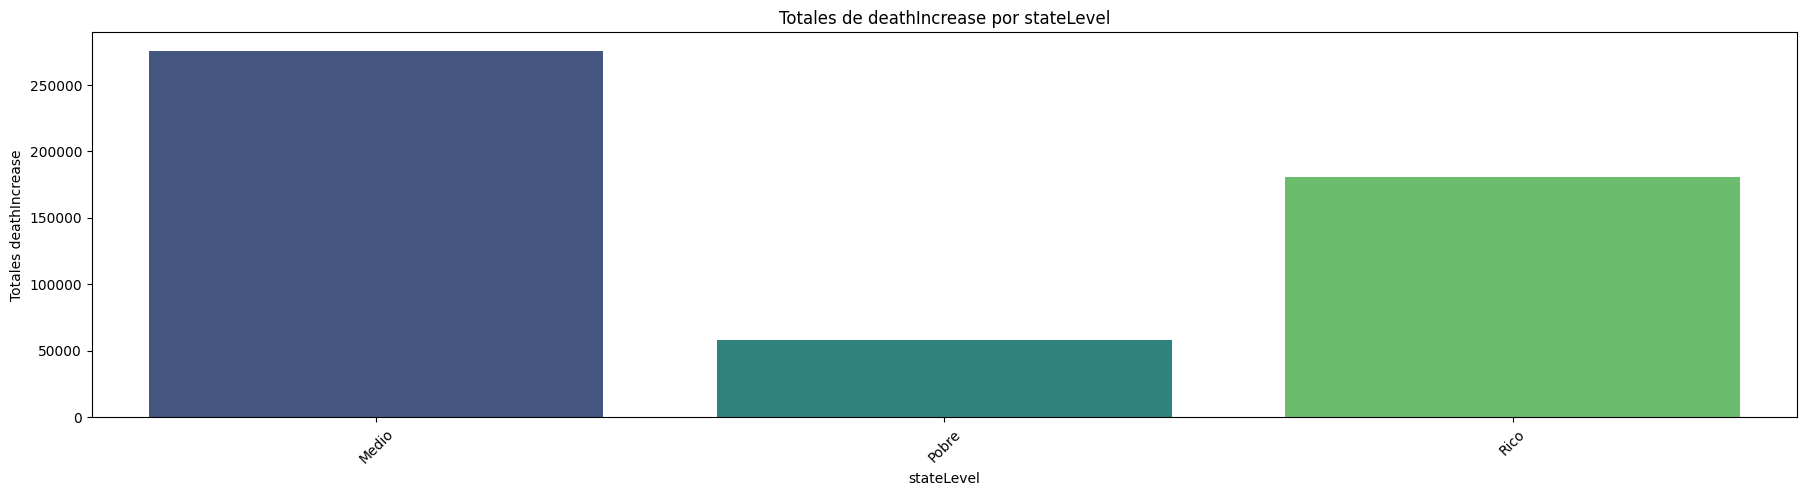

In [57]:
# Agrupar por stateLevel y calcular suma de deathIncrease
agg = df_resumen.groupby('stateLevel')['deathIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(22,5))
sns.barplot(x='stateLevel', y='deathIncrease', data=agg, palette='viridis')
plt.title("Totales de deathIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Totales deathIncrease")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4006043894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stateLevel', y='totalTestsViralIncrease', data=agg, palette='viridis')


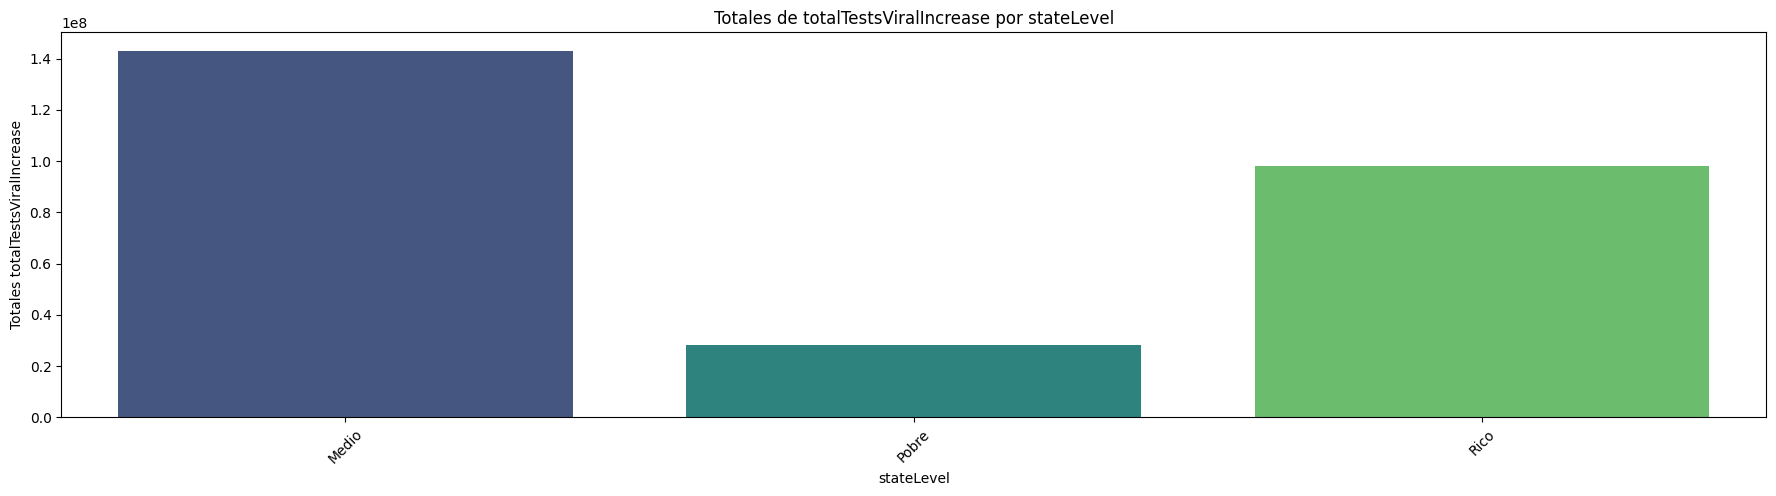

In [58]:
# Agrupar por stateLevel y calcular suma de totalTestsViralIncrease
agg = df_resumen.groupby('stateLevel')['totalTestsViralIncrease'].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(22,5))
sns.barplot(x='stateLevel', y='totalTestsViralIncrease', data=agg, palette='viridis')
plt.title("Totales de totalTestsViralIncrease por stateLevel")
plt.xlabel("stateLevel")
plt.ylabel("Totales totalTestsViralIncrease")
plt.xticks(rotation=45)
plt.show()

# 🌏 Mapa de Muertes totales por estado

In [59]:
# PINTAR MAPA CON ESTADOS Y TOTALES DEATH
import plotly.express as px

In [60]:
# 1. Preparo los datos totales de deathIncrease por estado
tot_death = df_resumen.groupby(['state'])['deathIncrease'].sum().reset_index()
tot_death

state  deathIncrease
0     AK            305
1     AL          10148
2     AR           5319
3     AS              0
4     AZ          16328
5     CA          54124
6     CO           5989
7     CT           7704
8     DC           1030
9     DE           1473
10    FL          32266
11    GA          17906
12    GU            133
13    HI            445
14    IA           5558
15    ID           1879
16    IL          23014
17    IN          12737
18    KS           4812
19    KY           4819
20    LA           9748
21    MA          16417
22    MD           7955
23    ME            706
24    MI          16658
25    MN           6550
26    MO           8161
27    MP              2
28    MS           6808
29    MT           1381
30    NC          11502
31    ND           1478
32    NE           2113
33    NH           1184
34    NJ          23574
35    NM           3808
36    NV           5037
37    NY          39029
38    OH          17656
39    OK           4534
40    OR           2296
41    PA          24349
42    PR           2062
43    RI           2547
44    SC           8754
45    SD           1900
46    TN          11543
47    TX          44451
48    UT           1976
49    VA           9596
50    VI             25
51    VT            208
52    WA           5041
53    WI           7106
54    WV           2325
55    WY            682

In [61]:
# Esto se hace para que el mapa se visualice en el notebook en Visual Studio Code
import plotly.io as pio

pio.renderers.default = "notebook"

In [62]:
# 2. Crear el mapa coroplético
fig = px.choropleth(tot_death,
                    locations='state',
                    locationmode="USA-states", # Reconoce códigos de estados
                    color='deathIncrease',             # Columna para los colores
                    scope="usa",               # Enfocar solo en EE.UU.
                    color_continuous_scale="Viridis", # Paleta de colores
                    title='Mapa de Estados USA'
                   )

# 3. Mostrar el mapa
fig.show()

# 💾 Fichero final

In [65]:
folder = "/content/drive/MyDrive/NoteFactoriaF5"

df_resumen.to_csv(f"{folder}/df_clean.csv", index=False)